<a href="https://colab.research.google.com/github/yashika-811/Object-motion-detector/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Check first few rows
print(df.head())

# Step 4: Check info and missing values
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Safe filling of missing values
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Check again
print(df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Step 9: Convert 'Sex' column – Label Encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Step 10: One-Hot Encoding for 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 11: Check the dataset after encoding
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

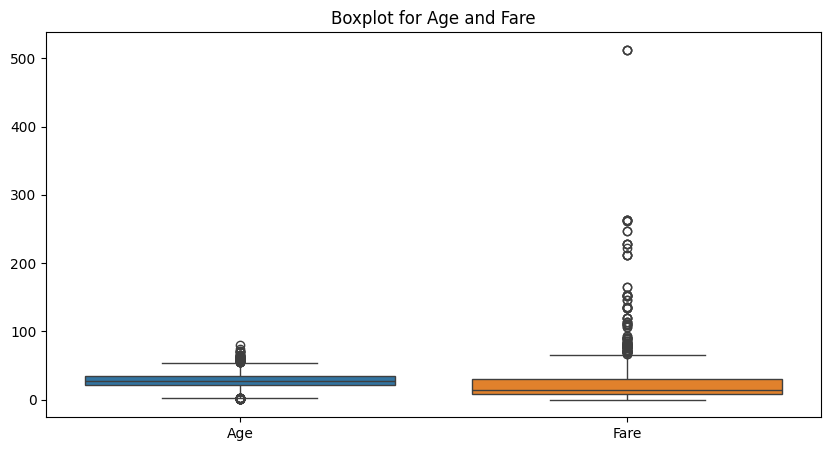

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in Age and Fare
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()


In [ ]:
# Calculate IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers in Fare
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

# Print new shape of dataset
print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (775, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create the scaler object
scaler = StandardScaler()

# Step 2: Apply scaling on Age and Fare columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 3: View the result
print(df[['Age', 'Fare']].head())


        Age      Fare
0 -0.528321 -0.779117
2 -0.215182 -0.729373
3  0.489381  2.599828
4  0.489381 -0.720161
5 -0.058613 -0.690071
